## Problem Set 4: Comparing Means - Housing

### Gabriella Rivera 

#### Data Exploration

1.

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [213]:
bs = pd.read_csv("beijing-seattle-airbnb-price.csv.bz2", sep = "\t")
bs

,city,price
0,Beijing,401
1,Beijing,436
2,Beijing,479
3,Beijing,415
4,Beijing,317
...,...,...
990,Seattle,275
991,Seattle,75
992,Seattle,99
993,Seattle,140


2.

In [214]:
print(bs.isna().sum())

city     0
price    0
dtype: int64


In [215]:
print(bs.shape)

(995, 2)


In [216]:
print(bs.city.value_counts())

city
Beijing    729
Seattle    266
Name: count, dtype: int64


The total number of observations is 995, 729 of those are in Beijing and 266 of those are in Seattle. There doesn't seem to be any missing, invalid, or suspicious entries. 

3.

(a)

In [217]:
print(bs.describe())

             price
count   995.000000
mean    323.949749
std     275.097893
min      30.000000
25%     176.000000
50%     267.000000
75%     401.000000
max    4097.000000


In [218]:
print(bs.groupby('city').describe())

         price                                                           
         count        mean         std   min    25%    50%    75%     max
city                                                                     
Beijing  729.0  365.292181  274.220866  77.0  218.0  296.0  422.0  4097.0
Seattle  266.0  210.646617  244.335794  30.0   95.0  149.0  180.0  1002.0


(b)

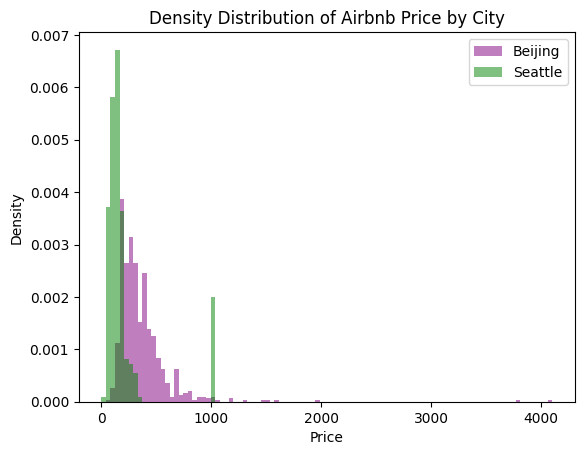

In [219]:
binrange = np.linspace(0, 4100, 100)
_ = plt.hist(bs[bs.city == "Beijing"].price, label="Beijing", bins= binrange, color="purple", density=True, alpha=0.5)
_ = plt.hist(bs[bs.city == "Seattle"].price, label="Seattle", bins= binrange, color="green", density=True, alpha=0.5)
_ = plt.legend()
_ = plt.title('Density Distribution of Airbnb Price by City')
_ = plt.xlabel('Price')
_ = plt.ylabel('Density')

(c) Beijing has more espensive AirBnBs. 

In [220]:
mean_price_diff = bs[bs['city'] == 'Beijing'].price.mean() - bs[bs['city'] == 'Seattle'].price.mean()
print(round(mean_price_diff, 2))

154.65


(d) The price data shown in the histograms does not appear to be normally distributed. The distribution of Airbnb prices is heavily skewed to the right, meaning there's a long tail on the higher price end. The histograms show a high peak on the left, indicating that a large number of Airbnbs are available at lower prices, and then the frequency of occurrences falls off quickly as price increases. This type of distribution is more characteristic of a log-normal distribution.

#### Part Two: Data Trasnformation

1.

In [221]:
ln_price = np.log(bs['price'])
print(ln_price)

0      5.993961
1      6.077642
2      6.171701
3      6.028279
4      5.758902
         ...   
990    5.616771
991    4.317488
992    4.595120
993    4.941642
994    5.192957
Name: price, Length: 995, dtype: float64


2.

In [222]:
ln_price_combined = np.log(bs.price)
print(ln_price_combined)
ln_price_combined.describe()

0      5.993961
1      6.077642
2      6.171701
3      6.028279
4      5.758902
         ...   
990    5.616771
991    4.317488
992    4.595120
993    4.941642
994    5.192957
Name: price, Length: 995, dtype: float64


count    995.000000
mean       5.563792
std        0.641641
min        3.401197
25%        5.170484
50%        5.587249
75%        5.993961
max        8.318010
Name: price, dtype: float64

In [223]:
ln_price_beijing = np.log(bs[bs['city'] == "Beijing"].price)
print(ln_price_beijing)
ln_price_beijing.describe()

0      5.993961
1      6.077642
2      6.171701
3      6.028279
4      5.758902
         ...   
724    5.283204
725    5.476464
726    5.958425
727    5.283204
728    5.170484
Name: price, Length: 729, dtype: float64


count    729.000000
mean       5.761401
std        0.489774
min        4.343805
25%        5.384495
50%        5.690359
75%        6.045005
max        8.318010
Name: price, dtype: float64

In [224]:
ln_price_seattle = np.log(bs[bs['city'] == "Seattle"].price)
print(ln_price_seattle)
ln_price_seattle.describe()

729    4.330733
730    4.382027
731    4.595120
732    4.442651
733    4.553877
         ...   
990    5.616771
991    4.317488
992    4.595120
993    4.941642
994    5.192957
Name: price, Length: 266, dtype: float64


count    266.000000
mean       5.022227
std        0.695318
min        3.401197
25%        4.553877
50%        5.003946
75%        5.192957
max        6.909753
Name: price, dtype: float64

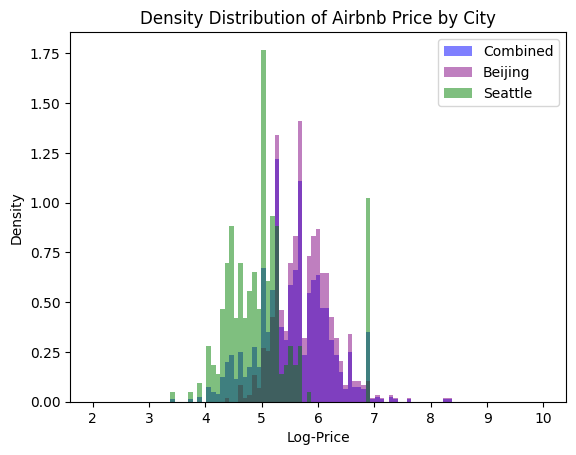

In [225]:
binrange = np.linspace(2, 10, 100)
_ = plt.hist(ln_price_combined, label="Combined", bins= binrange, color="blue", density=True, alpha=0.5)
_ = plt.hist(ln_price_beijing, label="Beijing", bins= binrange, color="purple", density=True, alpha=0.5)
_ = plt.hist(ln_price_seattle, label="Seattle", bins= binrange, color="green", density=True, alpha=0.5)
_ = plt.legend()
_ = plt.title('Density Distribution of Airbnb Price by City')
_ = plt.xlabel('Log-Price')
_ = plt.ylabel('Density')

3.

In [226]:
mean_ln_price_diff = ln_price_beijing.mean() - ln_price_seattle.mean()
print(round(mean_ln_price_diff, 3))

0.739


####   3 Brute-Force Approach

1.

In [227]:
o_log_Mu = np.mean(ln_price_combined)
o_log_Sd = np.std(ln_price_combined)
print(round(o_log_Mu, 3))
print(round(o_log_Sd, 3))

5.564
0.641


2.

In [228]:
simulatedlogBeijing = np.random.normal(o_log_Mu, o_log_Sd, size=729) 
simulatedlogSeattle = np.random.normal(o_log_Mu, o_log_Sd, size=266) 
simulatedlogBeijing[:20]

array([5.93814551, 5.21475207, 5.46975086, 5.17072283, 6.36149186,
       5.93238186, 6.52422893, 6.31222626, 5.91553473, 5.71601918,
       5.03159879, 4.93303003, 4.48875687, 5.74038358, 6.6542079 ,
       4.77966251, 5.15021237, 5.0176055 , 5.44490326, 5.47801541])

In [229]:
simulatedlogSeattle[:20]

array([6.40185356, 5.16794261, 5.33964034, 4.98773691, 6.13027912,
       5.73963695, 5.37042349, 5.64085602, 4.71721428, 5.90139525,
       5.77382526, 5.60334475, 5.7336866 , 7.22071698, 5.7540476 ,
       5.9551681 , 5.59122177, 4.76622157, 4.76973156, 6.33551569])

In [230]:
sim_log_price_mean_diff = simulatedlogBeijing.mean() - simulatedlogSeattle.mean()
print(round(sim_log_price_mean_diff, 3))

-0.012


Question 2.3's mean price difference is 0.739 , which is greater than the simulated mean price difference, which is 0.093

3.

In [231]:
converted_prices_b = np.exp(simulatedlogBeijing)
converted_prices_s = np.exp(simulatedlogSeattle)
mean_diff_converted = np.mean(converted_prices_b) - np.mean(converted_prices_s)
print(round(mean_diff_converted, 3))

-9.708


4. The reason for this decision is tied to the null hypothesis, which states that there is no difference in the underlying population prices between the two cities. To test this, we simulate data under the assumption that this null hypothesis is correct — hence, both cities come from the same distribution, characterized by the same mean and variance. By using the same mean and variance, any differences observed in the simulated data can be attributed solely to random variation.  By keeping the mean and standard deviation constant, we control for variability between the two sets of data.

5.

In [232]:
R = 1000
diffs = np.empty(R)
for i in range(R):
    simulated_B = np.random.normal(o_log_Mu, o_log_Sd, size=729)
    simulated_S = np.random.normal(o_log_Mu, o_log_Sd, size=266)
    diffs[i] = np.mean(simulated_B) - np.mean(simulated_S)

6.

In [233]:
print(abs(diffs).max())

0.1548359254335745


7.

In [234]:
np.percentile(diffs, [0.5, 99.5])

array([-0.12583127,  0.12240912])

8. No, the observed difference in log-price (Question 2.3) does not fall into that interval.

9. If the actual observed difference in Airbnb prices between the two cities is less than or around the maximum difference seen in the simulations, it suggests that the observed difference could be due to sample variation — that is, it could occur by chance alone when drawing samples from populations with no true difference in means.
However, if the actual observed difference is greater than the maximum difference seen in the simulations or lies outside the 99% confidence interval, it suggests that the observed difference is unlikely to be due to chance alone and that there might be a real difference in Airbnb prices between the two cities.

#### 4 Part Four: t-test

1.

In [235]:
ln_std_dev_beijing = np.std(ln_price_beijing)     # standard deviation for Beijing log-prices
ln_std_dev_seattle = np.std(ln_price_seattle)     # standard deviation for Seattle log-prices
n_beijing = 729                                   # sample size for Beijing
n_seattle = 266                                   # sample size for Seattle

sigma = np.sqrt((ln_std_dev_beijing ** 2 / n_beijing) + (ln_std_dev_seattle ** 2 / n_seattle))
print(round(sigma, 3))

0.046


2.

In [236]:
# degrees of freedom = min(n_beijing - 1, n_seattle - 1) = 265
t_crit = 2.59

# Option 1: Compute a 99% CI around H0 value and check if the apparent difference lies within that CI 

# Our null hypothesis H0 is that the difference in prices in the underlying population of AirBnBs in Beijing is 0
lower_limit = 0 - (t_crit * sigma)
upper_limit = 0 + (t_crit * sigma)

print(f"The 99% CI is from {round(lower_limit, 3)} to {round(upper_limit, 3)}")

The 99% CI is from -0.12 to 0.12


In [237]:
# Our null hypothesis H0 is that the difference in prices in the underlying population of AirBnBs in Beijing is 0

In [238]:
# Option 2: Compute a 99% CI around the apparent difference between cities, and check of H0 lies within that CI. 

lower_limit = mean_ln_price_diff - (t_crit * sigma)
upper_limit = mean_ln_price_diff + (t_crit * sigma)

print(f"The 99% CI is from {round(lower_limit, 3)} to {round(upper_limit, 3)}")

The 99% CI is from 0.619 to 0.859


3. Based on both CIs I calculated, I do feel comfortable rejecting the null hypothesis H0.

4. Sigma is the standard error of of the difference of mean log-prices.

5.

In [285]:
t_value = mean_ln_price_diff / sigma
print(round(t_value, 2))

15.98


6. A t-value of 15.98 would be beyond the values listed in typical t-tables, which means it would correspond to a p-value significantly smaller than the smallest p-values typically given in the table (often p < 0.0001). In practical terms, this t-value suggests that the likelihood of observing such a large difference in means, if the null hypothesis were true (meaning no actual difference), is extremely low. It is unlikely to see this value just by random chance. 

7. Given the t-value calculated and its associated very small p-value, you would reject the null hypothesis that there is no difference in prices. The conclusion is that it is very unlikely that the observed difference in mean log-prices between Beijing and Seattle is due to random chance. Therefore, based on this statistical evidence, it can be concluded that Beijing is more expensive than Seattle when it comes to Airbnb prices, according to the data analyzed.

#### 5 Canned t-test Function

1. 

In [252]:
scipy.stats.ttest_ind(ln_price_beijing, ln_price_seattle, equal_var=False)

TtestResult(statistic=15.954061957013737, pvalue=7.439441804547704e-44, df=365.2794634821374)

In [258]:
t_statistic, p_value = scipy.stats.ttest_ind(ln_price_beijing, ln_price_seattle, equal_var=False)
print(round(t_statistic, 2), round(p_value, 3))

15.95 0.0


2. In conclusion, all indicators seem to agree that there is a statistically significant difference in Airbnb log-prices between Beijing and Seattle. From the simulations, you found that the difference in mean log-prices could not be attributed to random chance alone. The 99% confidence interval did not contain the null value of zero, indicating a significant difference. The calculated t-value was much larger than any typical critical value for a t-distribution, suggesting a very low probability that such an extreme value could occur if the null hypothesis were true. Finally, the Python t-test yielded a p-value far below any conventional threshold for statistical significance, reinforcing the rejection of the null hypothesis.

#### 6 Challenge

1.

In [259]:
R = 1000000
diffs = np.empty(R)
for i in range(R):
    simulated_B = np.random.normal(o_log_Mu, o_log_Sd, size=729)
    simulated_S = np.random.normal(o_log_Mu, o_log_Sd, size=266)
    diffs[i] = np.mean(simulated_B) - np.mean(simulated_S)

It took my computer 42 seconds to run 1000000 simulations

In [283]:
time_per_simulation = 42 / 1000000

time_for_10_12 = (time_per_simulation) * 10**12
minutes = time_for_10_12 / 60
hours = minutes / 60
days = hours / 24
print('It would take approximately ', round(days, 2), ' days to run 10^12 or so experiments')

It would take approximately  486.11  days to run 10^12 or so experiments


2.

In [314]:
from scipy import stats
norm = stats.norm()
p = norm.cdf(-t_value) 
print(p)

8.639329607955963e-58


In the example given, norm.cdf(-1.96) is used instead of norm.cdf(1.96) because the normal distribution is symmetric around zero, and the CDF is used to find the probability in the lower tail of the distribution. For a two-tailed test, you are interested in the probability of observing a value as extreme or more extreme in either direction. Since the normal distribution is symmetric, norm.cdf(-1.96) will give you the probability in the lower tail, and 1 - norm.cdf(1.96) would give you the probability in the upper tail. Both of these would be close to 0.025 when looking at a 95% confidence interval, because the 5% significance level is split into 2.5% in each tail of the distribution.

If you have a t-value (let's call it t_val), you would want to find the probability of observing a t-value that extreme or more so. If t_val is positive, you would calculate 1 - norm.cdf(t_val) to get the upper tail probability. If t_val is negative, you would calculate norm.cdf(t_val) to get the lower tail probability. 

3.

In [292]:
iterations = 3 / p
print(iterations)

3.472491658655202e+57


4.

In [312]:
time = time_per_simulation * iterations
minutes = time / 60
hours = minutes / 60
days = hours / 24
years = days / 365
print('I have, ', years, ' to run the simulations')
# bajillion_yrs = years / 10000000000000000000000000000000000000000000000000
# bajillion_yrs

I have,  4.624703502775193e+45  to run the simulations


This is a crazy long amount of time. If the dinosaurs had started this simulation it still wouldn't be finished. 